In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.ndimage.filters
import numpy.linalg
import illustris_python.groupcat as gc

%matplotlib inline

In [65]:
filename = '/Users/forero/Illustris_data/WEB_CIC_256_DM_TNG300-2.hdf5'
f = h5py.File(filename, 'r')
print(f.keys())
density_smooth = f['density_smooth'][:,:,:]
lambda1 = f['lambda1'][:,:,:]
lambda2 = f['lambda2'][:,:,:]
lambda3 = f['lambda3'][:,:,:]
f.close()

<KeysViewHDF5 ['density_smooth', 'eigenvector1', 'eigenvector2', 'eigenvector3', 'hessian', 'lambda1', 'lambda2', 'lambda3', 'potential']>


In [4]:
basePath = "/Users/forero/Illustris_data/TNG300-1/"

halo_fields = ['GroupFirstSub', 'Group_M_Crit200', 'Group_R_Crit200', 'Group_M_Mean200',
               'GroupNsubs', 'GroupPos', 'GroupVel', 'GroupFirstSub', 'GroupMassType']
halos = gc.loadHalos(basePath,99, fields=halo_fields) # the selection is based on the FOF groups


subhalo_fields = ['SubhaloMass','SubhaloSFRinRad', 'SubhaloPos', 'SubhaloVmax','SubhaloMassType',
                  'SubhaloVel', 'SubhaloParent', 'SubhaloGrNr', 'SubhaloStellarPhotometrics']
subhalos = gc.loadSubhalos(basePath,99, fields=subhalo_fields)
header = gc.loadHeader(basePath,99)
BoxSize = header['BoxSize']
# Photometric bands are: U, B, V, K, g, r, i, z 

In [66]:
r_absolute = subhalos['SubhaloStellarPhotometrics'][:,5]
ii = r_absolute < 100
pos = subhalos['SubhaloPos']%BoxSize
pos = pos[ii]
r_absolute_gal = r_absolute[ii]

In [67]:
delta_box = BoxSize/np.shape(lambda1)[0]
print(delta_box)

800.78125


In [68]:
ii_box = np.int_(pos[:,0]//delta_box)
jj_box = np.int_(pos[:,1]//delta_box)
kk_box = np.int_(pos[:,2]//delta_box)

In [69]:
lambda1_gal = lambda1[ii_box, jj_box, kk_box]
lambda2_gal = lambda2[ii_box, jj_box, kk_box]
lambda3_gal = lambda3[ii_box, jj_box, kk_box]
density_gal = density_smooth[ii_box, jj_box, kk_box]

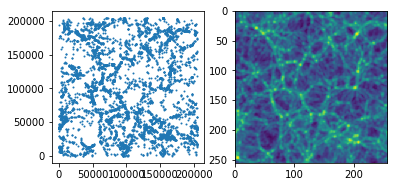

In [101]:
slice_kk = 50
slice_z = (pos[:,2]>(slice_kk*delta_box)) & (pos[:,2]<((slice_kk+1)*delta_box))

plt.subplot(1,2,1)
plt.scatter(pos[slice_z,0], pos[slice_z,1], s=1.0)
plt.axis('scaled')

tmp_slice = density_smooth[:,:,slice_kk].T
my_slice = tmp_slice[::-1]

plt.subplot(1,2,2)
plt.imshow(np.log10(my_slice +1.0))

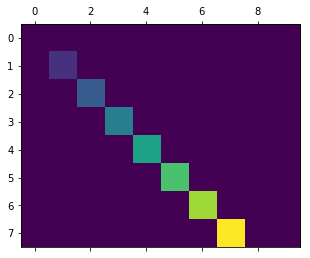

In [95]:
def samplemat(dims):
    """Make a matrix with all zeros and increasing elements on the diagonal"""
    aa = np.zeros(dims)
    for i in range(min(dims)):
        aa[i, i] = i
    return aa
plt.matshow(samplemat([10,8]).T)

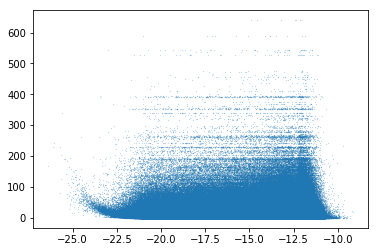

In [31]:
plt.scatter(r_absolute_gal, density_gal, s=0.01)

In [5]:
FA = (1.0/np.sqrt(3.0))*np.sqrt(((lambda1-lambda2)**2 + (lambda1-lambda3)**2 + (lambda2-lambda3)**2)/(lambda1**2+lambda2**2+lambda3**2))
FA_flat = FA.flatten()

In [6]:
density_flat = density_smooth.flatten()

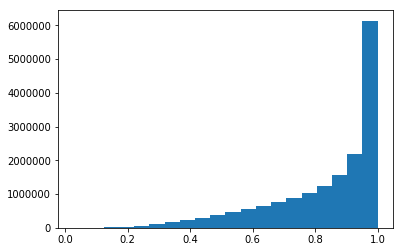

In [7]:
_ = plt.hist(FA_flat, bins=20)

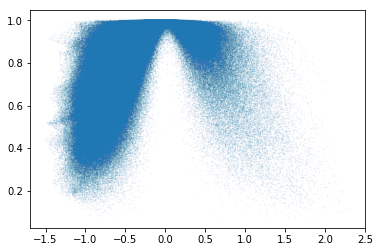

In [24]:
_=plt.scatter(np.log10(density_flat[:1000000]+1.0), FA_flat[:1000000], alpha=0.1, s=0.1)

In [58]:
trace = (lambda1+lambda2+lambda3)
np.count_nonzero(trace<-1.0)/len(FA_flat)
trace[trace<-1.0] = -0.9999999

In [59]:
alpha = np.sqrt(0.5*((lambda1-lambda2)**2 + (lambda1-lambda3)**2 + (lambda2-lambda3)**2))/(trace+1)
log_alpha_flat = np.log10(alpha.flatten())

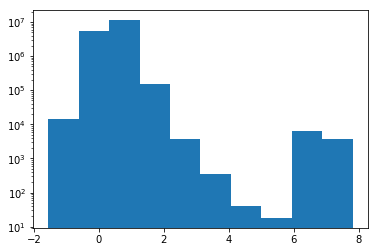

In [60]:
_ = plt.hist(alpha_flat, log=True)

(-1, 2)

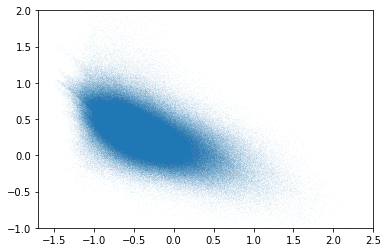

In [64]:
_=plt.scatter(np.log10(density_flat[:1000000]+1.0), log_alpha_flat[:1000000], alpha=0.1, s=0.01)
plt.ylim(-1,2)